In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
import streamlit as st
import pickle as pk

In [5]:
df = pd.read_csv("bike_rent.csv")

--- Data Exploration and Cleaning

Exploratory Data Analysis (EDA)

In [6]:
df = df.rename(columns = {"instant": "Instant", "dteday": "Date", "season": "Season", "yr": "Year", "mnth": "Month", "hr": "Hour",
        "holiday": "Holiday", "weekday": "Weekday","workingday": "WorkingDay", "weathersit": "Weather_Condition",
        "temp": "Tempature", "atemp": "aTempature", "hum": "Humidity","windspeed": "WindSpeed",
        "casual": "Casual", "registered": "Registered", "cnt": "TotalCount"})

Dropping the Instant Column from Dataset

In [7]:
df.drop(["Instant"], axis = 1, inplace = True)

In [8]:
df.head()

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [9]:
df.shape

(17379, 16)

In [10]:
df.describe()

,Hour,Weekday,TotalCount
count,17379.000000,17379.000000,17379.000000
mean,11.546752,3.003683,189.463088
std,6.914405,2.005771,181.387599
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,40.000000
50%,12.000000,3.000000,142.000000
75%,18.000000,5.000000,281.000000
max,23.000000,6.000000,977.000000


In [11]:
df.nunique()

Date                 731
Season                 5
Year                   3
Month                 13
Hour                  24
Holiday                3
Weekday                7
WorkingDay             3
Weather_Condition      5
Tempature             51
aTempature            66
Humidity              90
WindSpeed             31
Casual               323
Registered           777
TotalCount           869
dtype: int64

In [12]:
df.dtypes

Date                 object
Season               object
Year                 object
Month                object
Hour                  int64
Holiday              object
Weekday               int64
WorkingDay           object
Weather_Condition    object
Tempature            object
aTempature           object
Humidity             object
WindSpeed            object
Casual               object
Registered           object
TotalCount            int64
dtype: object

In [13]:
columns = df.columns
columns

Index(['Date', 'Season', 'Year', 'Month', 'Hour', 'Holiday', 'Weekday',
       'WorkingDay', 'Weather_Condition', 'Tempature', 'aTempature',
       'Humidity', 'WindSpeed', 'Casual', 'Registered', 'TotalCount'],
      dtype='object')

In [14]:
df["Season"].unique()

array(['springer', '?', 'summer', 'fall', 'winter'], dtype=object)

In [15]:
df["Year"].unique()

array(['2011', '?', '2012'], dtype=object)

In [16]:
df["Month"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '?'],
      dtype=object)

In [17]:
df["Holiday"].unique()

array(['No', 'Yes', '?'], dtype=object)

In [18]:
df["WorkingDay"].unique()

array(['No work', 'Working Day', '?'], dtype=object)

In [19]:
df["Weather_Condition"].unique()

array(['Clear', 'Mist', '?', 'Light Snow', 'Heavy Rain'], dtype=object)

Filter the rows which containing the Question Mark Symbol.

In [20]:
rows_symbol = df.apply(lambda row : "?" in row.values, axis = 1)
rows_idx = df[rows_symbol].index

print("Rows containing the ? symbol are at the following indices:")
print(rows_idx.tolist())

Rows containing the ? symbol are at the following indices:
[2, 6, 9, 11, 12, 15, 18, 42, 82, 144, 228, 341, 354, 380, 384, 401, 17198, 17201, 17203, 17204, 17210, 17212, 17213, 17215, 17232, 17271, 17273, 17274, 17277, 17294, 17311, 17327, 17333, 17359, 17365, 17368, 17371, 17372, 17376, 17378]


r'\?': This is a raw string literal. Which replaces the Question Mark Symbol with the Empty space
regex = True - This argument indicates that the first argument (r'\?') should be interpreted as a regular expression.

In [21]:
df = df.replace(r"\?", "", regex = True)
df.head(7)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,,0,5,27,32
3,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1
6,01-01-2011,springer,2011,1,6,No,6,No work,,0.22,0.2727,0.8,0,2,0,2


Replacing the empty cells with the random values - ["springer", "fall", "summer", "winter"]

In [22]:
df["Season"] = df["Season"].replace("", np.random.choice(["springer", "fall", "summer", "winter"]))
df.head(16)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,,0,5,27,32
3,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1
6,01-01-2011,springer,2011,1,6,No,6,No work,,0.22,0.2727,0.8,0,2,0,2
7,01-01-2011,springer,2011,1,7,No,6,No work,Clear,0.2,0.2576,0.86,0,1,2,3
8,01-01-2011,springer,2011,1,8,No,6,No work,Clear,0.24,0.2879,0.75,0,1,7,8
9,01-01-2011,springer,2011,1,9,No,6,No work,Clear,,0.3485,0.76,0,8,6,14


In [23]:
df.loc[df["Year"].str.strip() == "", "Year"] = np.random.choice(["2011", "2012"])
df.tail(20)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
17359,31-12-2012,springer,2012,12,4,No,1,Working Day,Clear,0.14,0.1667,0.69,,0,3,3
17360,31-12-2012,springer,2012,12,5,No,1,Working Day,Clear,0.16,0.1515,0.64,0.194,0,9,9
17361,31-12-2012,springer,2012,12,6,No,1,Working Day,Clear,0.16,0.1667,0.64,0.1642,0,40,40
17362,31-12-2012,springer,2012,12,7,No,1,Working Day,Clear,0.16,0.1818,0.64,0.1343,2,83,85
17363,31-12-2012,springer,2012,12,8,No,1,Working Day,Clear,0.14,0.1515,0.69,0.1343,9,187,196
17364,31-12-2012,springer,2012,12,9,No,1,Working Day,Mist,0.18,0.2121,0.64,0.1045,13,144,157
17365,31-12-2012,springer,2012,12,10,No,1,Working Day,Mist,,,0.69,0.1343,33,87,120
17366,31-12-2012,springer,2012,12,11,No,1,Working Day,Mist,0.22,0.2273,0.6,0.194,43,114,157
17367,31-12-2012,springer,2012,12,12,No,1,Working Day,Mist,0.24,0.2273,0.56,0.194,52,172,224
17368,31-12-2012,springer,2012,12,13,No,1,Working Day,Mist,0.26,0.2576,,0.1642,38,165,203


17372 - row

In [24]:
df.loc[df["Month"].str.strip() == "", "Month"] = np.random.choice(
    ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])

df.tail(10)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
17369,31-12-2012,springer,2012,12,14,No,1,Working Day,Mist,0.28,0.2727,0.45,0.2239,62,185,247
17370,31-12-2012,springer,2012,12,15,No,1,Working Day,Mist,0.28,0.2879,0.45,0.1343,69,246,315
17371,31-12-2012,springer,2012,12,16,,1,Working Day,Mist,0.26,,0.48,0.194,30,184,214
17372,31-12-2012,springer,2012,9,17,No,1,Working Day,Mist,0.26,0.2879,0.48,0.0896,14,150,164
17373,31-12-2012,springer,2012,12,18,No,1,Working Day,Mist,0.26,0.2727,0.48,0.1343,10,112,122
17374,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,,0.2576,0.6,0.1642,7,83,90
17377,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,31-12-2012,springer,2012,12,23,No,1,,Clear,0.26,0.2727,0.65,0.1343,12,37,49


17371 - row

In [25]:
df["Holiday"] = df["Holiday"].replace("", np.random.choice(["No", "Yes"]))
df.tail(9)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
17370,31-12-2012,springer,2012,12,15,No,1,Working Day,Mist,0.28,0.2879,0.45,0.1343,69,246,315
17371,31-12-2012,springer,2012,12,16,No,1,Working Day,Mist,0.26,,0.48,0.194,30,184,214
17372,31-12-2012,springer,2012,9,17,No,1,Working Day,Mist,0.26,0.2879,0.48,0.0896,14,150,164
17373,31-12-2012,springer,2012,12,18,No,1,Working Day,Mist,0.26,0.2727,0.48,0.1343,10,112,122
17374,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,,0.2576,0.6,0.1642,7,83,90
17377,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,31-12-2012,springer,2012,12,23,No,1,,Clear,0.26,0.2727,0.65,0.1343,12,37,49


17378 - row

In [26]:
df.loc[df["WorkingDay"].str.strip() == "", "WorkingDay"] = np.random.choice(["Working Day", "No work"])
df.tail(4)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
17375,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,,0.2576,0.6,0.1642,7,83,90
17377,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,31-12-2012,springer,2012,12,23,No,1,No work,Clear,0.26,0.2727,0.65,0.1343,12,37,49


Replacing the empty cells with the random values - ["Clear", "Mist", "Light Snow", "Heavy Rain"]

In [27]:
df["Weather_Condition"] = df["Weather_Condition"].replace("", np.random.choice(["Clear", "Mist", "Light Snow", "Heavy Rain"]))
df.head(9)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,,0,5,27,32
3,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1
6,01-01-2011,springer,2011,1,6,No,6,No work,Heavy Rain,0.22,0.2727,0.8,0,2,0,2
7,01-01-2011,springer,2011,1,7,No,6,No work,Clear,0.2,0.2576,0.86,0,1,2,3
8,01-01-2011,springer,2011,1,8,No,6,No work,Clear,0.24,0.2879,0.75,0,1,7,8


Finding the Median Values for each Numberical Column and placing that Median Values in those Numberical Column Seperatly

In [28]:
emp_col = ["Tempature", "aTempature", "Humidity", "WindSpeed", "Casual", "Registered"]

df[emp_col] = df[emp_col].apply(pd.to_numeric, errors = "coerce")

imputer = SimpleImputer(strategy = "median")
df[emp_col] = imputer.fit_transform(df[emp_col])

df.head(22)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40
2,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0000,5.0,27.0,32
3,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1
5,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0.0,1.0,1
6,01-01-2011,springer,2011,1,6,No,6,No work,Heavy Rain,0.22,0.2727,0.80,0.0000,2.0,0.0,2
7,01-01-2011,springer,2011,1,7,No,6,No work,Clear,0.20,0.2576,0.86,0.0000,1.0,2.0,3
8,01-01-2011,springer,2011,1,8,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,1.0,7.0,8
9,01-01-2011,springer,2011,1,9,No,6,No work,Clear,0.50,0.3485,0.76,0.0000,8.0,6.0,14


In [29]:
df.dtypes

Date                  object
Season                object
Year                  object
Month                 object
Hour                   int64
Holiday               object
Weekday                int64
WorkingDay            object
Weather_Condition     object
Tempature            float64
aTempature           float64
Humidity             float64
WindSpeed            float64
Casual               float64
Registered           float64
TotalCount             int64
dtype: object

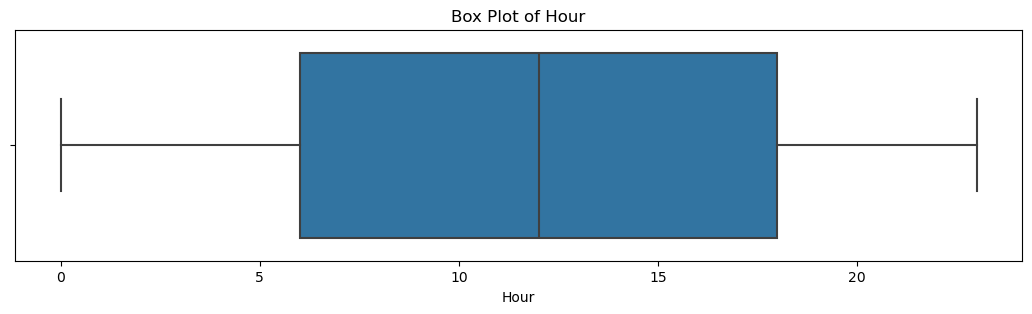

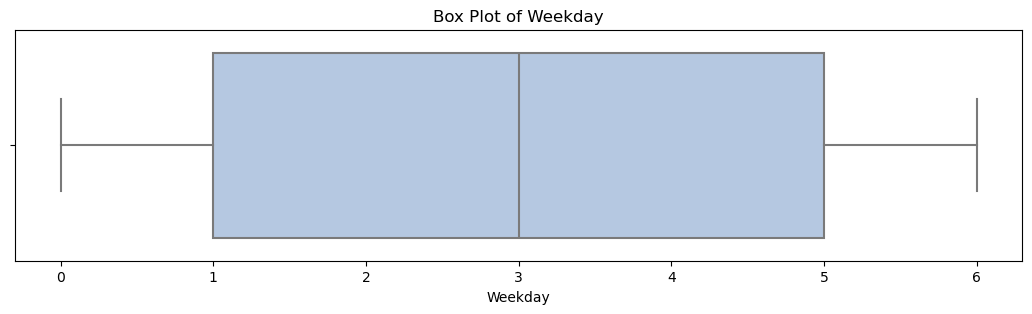

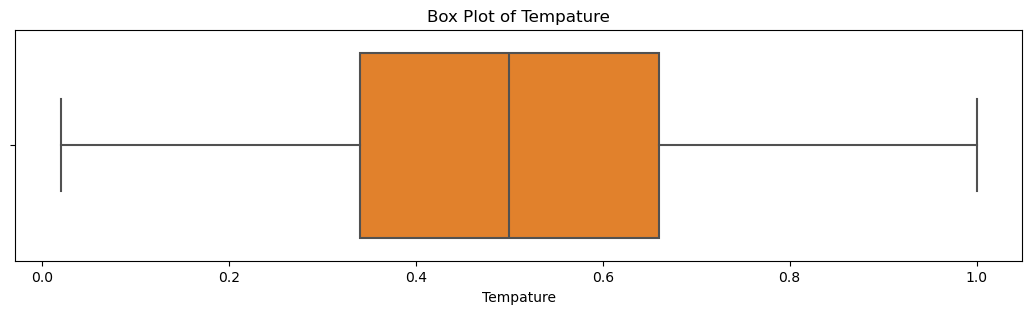

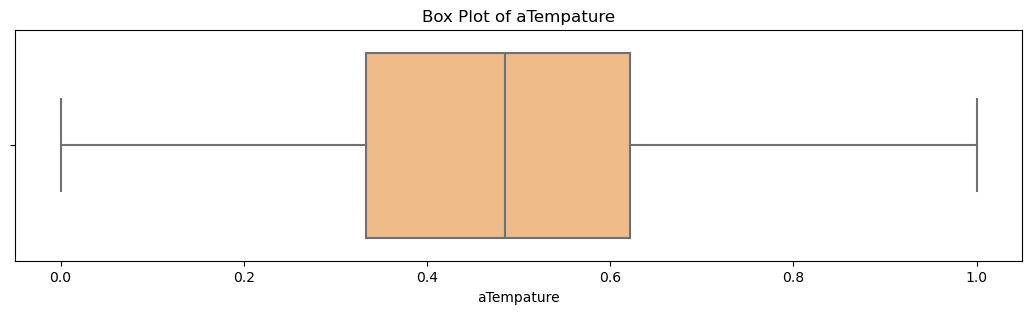

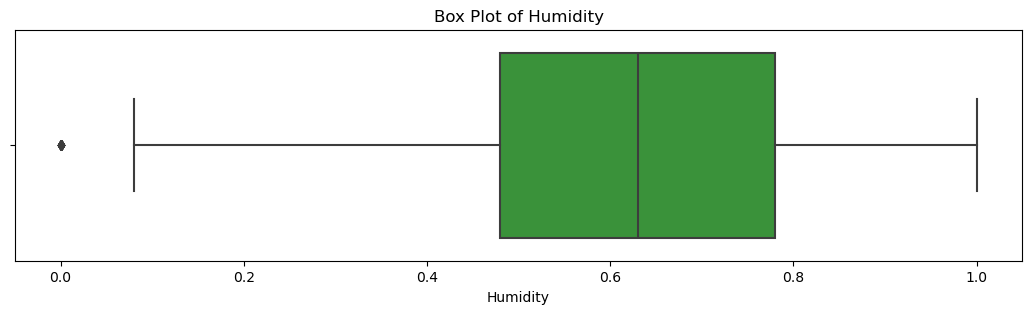

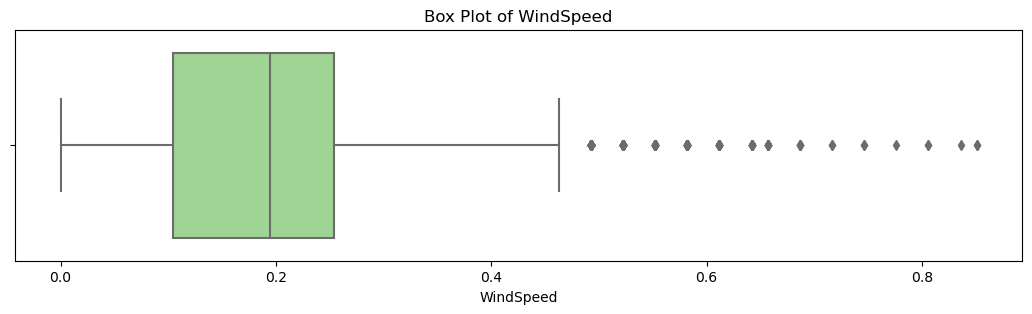

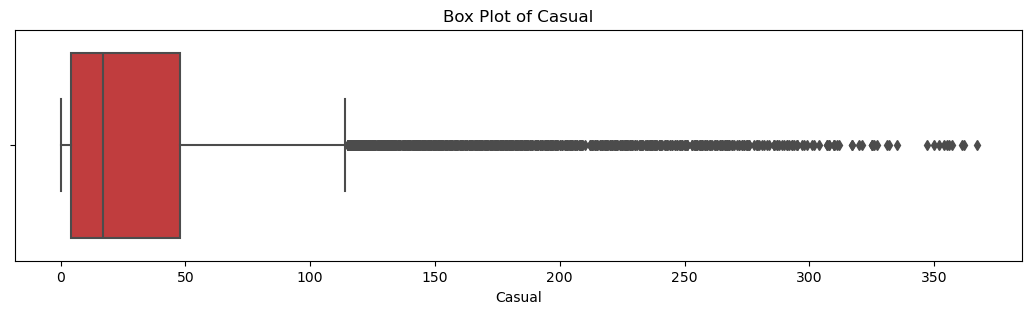

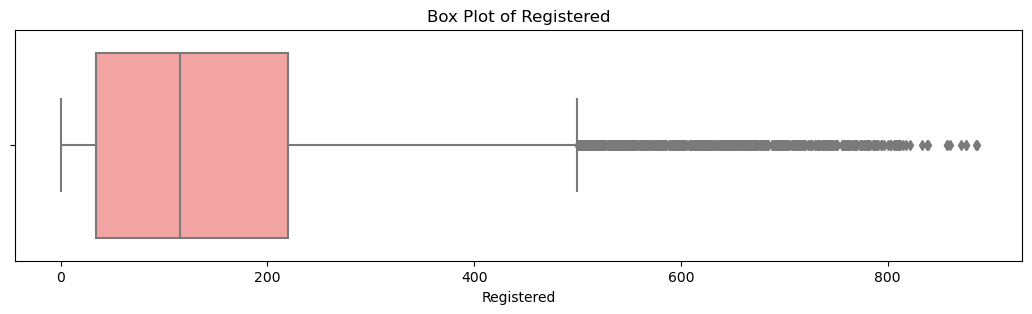

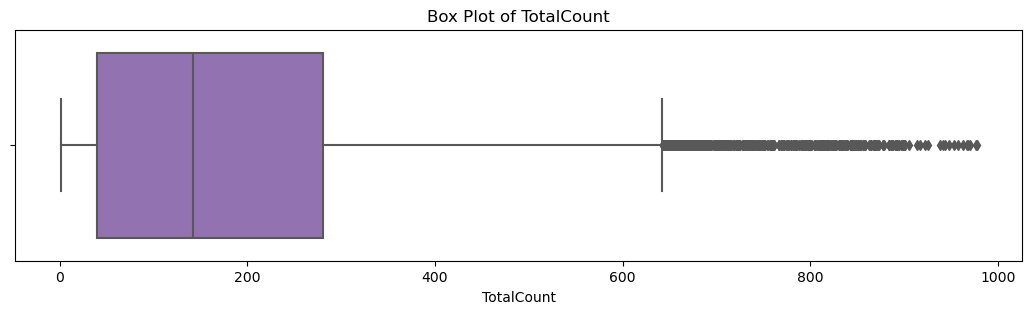

In [30]:
num_columns = df.select_dtypes(include = ["number"])

palette = sns.color_palette("tab20", len(num_columns))

for i, col in enumerate(num_columns):
    plt.figure(figsize = (13, 3))
    sns.boxplot(x = df[col], color = palette[i])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

In [31]:
for colms in df.select_dtypes(include = ["number"]):
    Q1 = df[colms].quantile(0.25)
    Q3 = df[colms].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Bound = Q1 - 1.5 * IQR
    Upper_Bound = Q3 + 1.5 * IQR

    df[colms] = np.where(df[colms] > Upper_Bound, Upper_Bound, df[colms])
    df[colms] = np.where(df[colms] < Lower_Bound, Lower_Bound, df[colms])

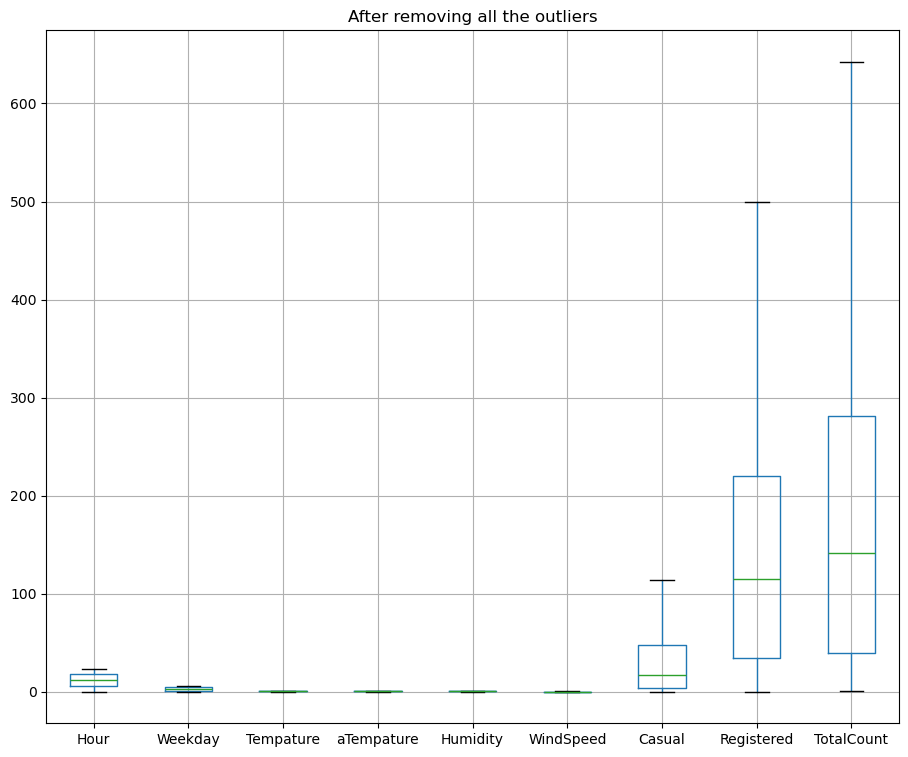

In [32]:
plt.figure(figsize = (11, 9))
df.boxplot()
plt.title("After removing all the outliers")
plt.show()

--- Data Visulization

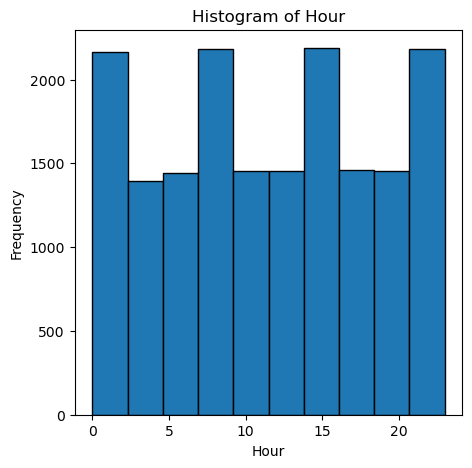

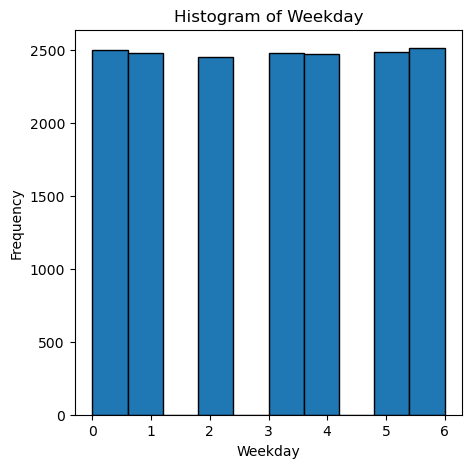

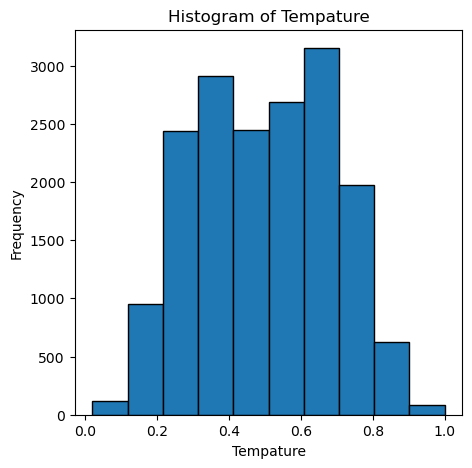

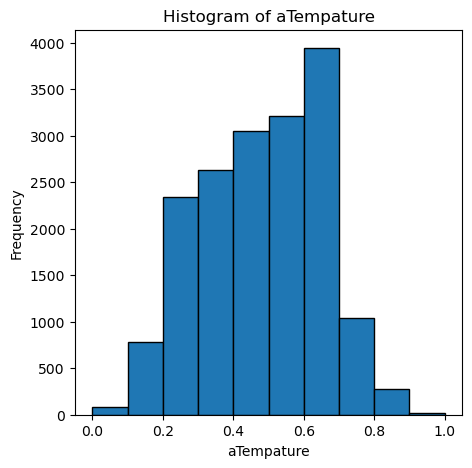

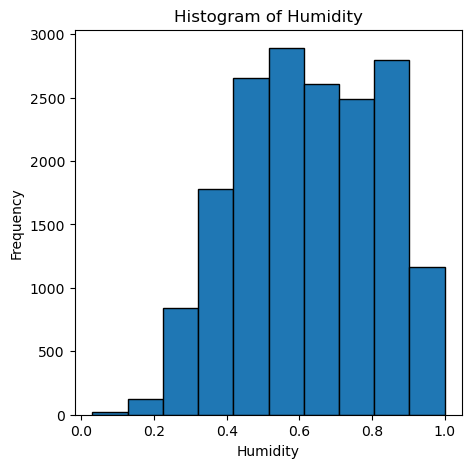

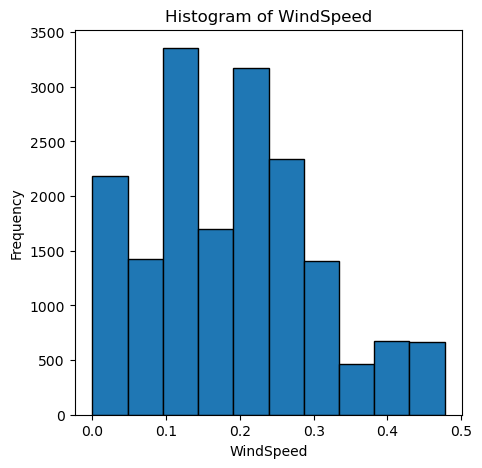

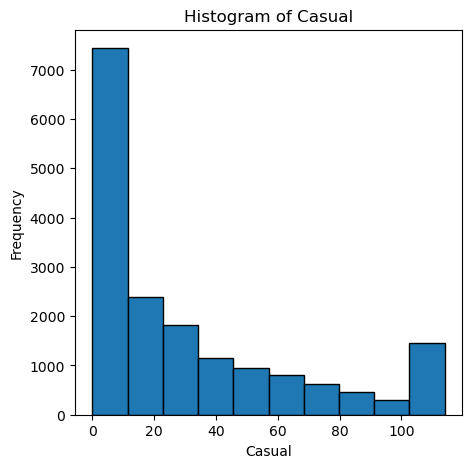

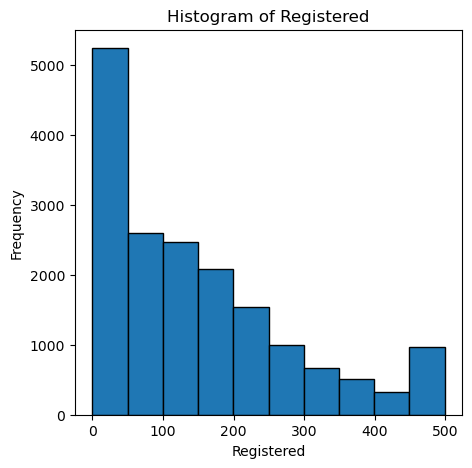

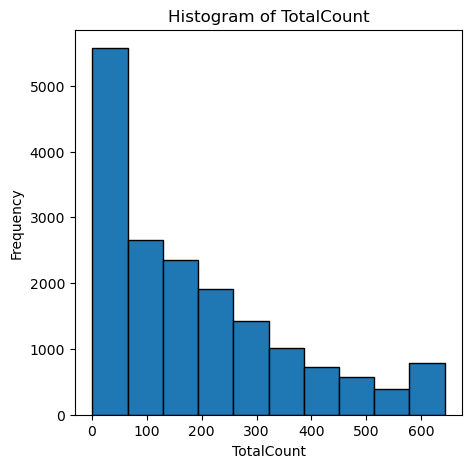

In [33]:
for column in df.select_dtypes(include = ["number"]):
    plt.figure(figsize = (5, 5))
    plt.hist(df[column], bins = 10, edgecolor = "Black") 
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

In [34]:
num_features = ["Tempature", "aTempature", "Humidity", "WindSpeed"]

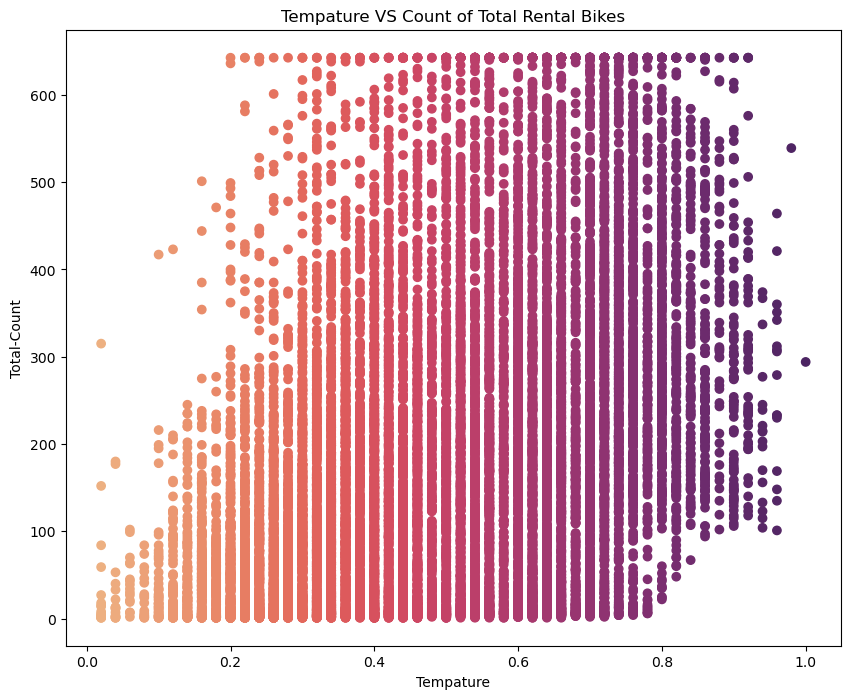

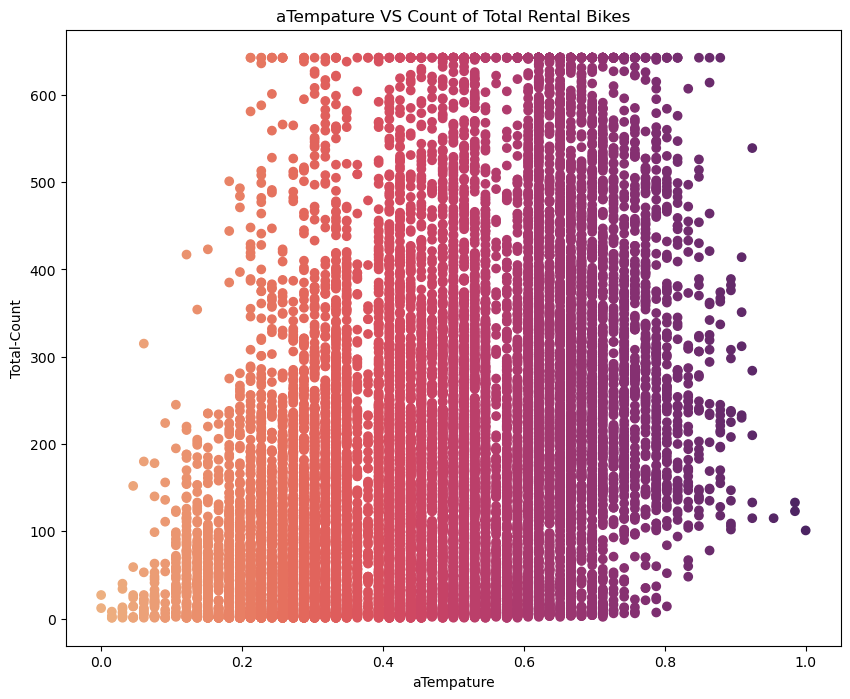

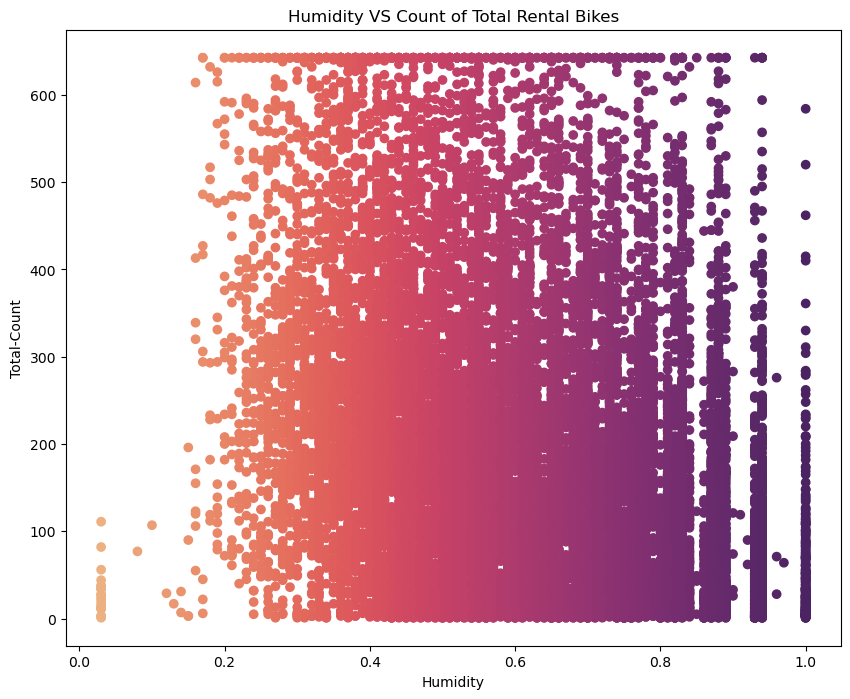

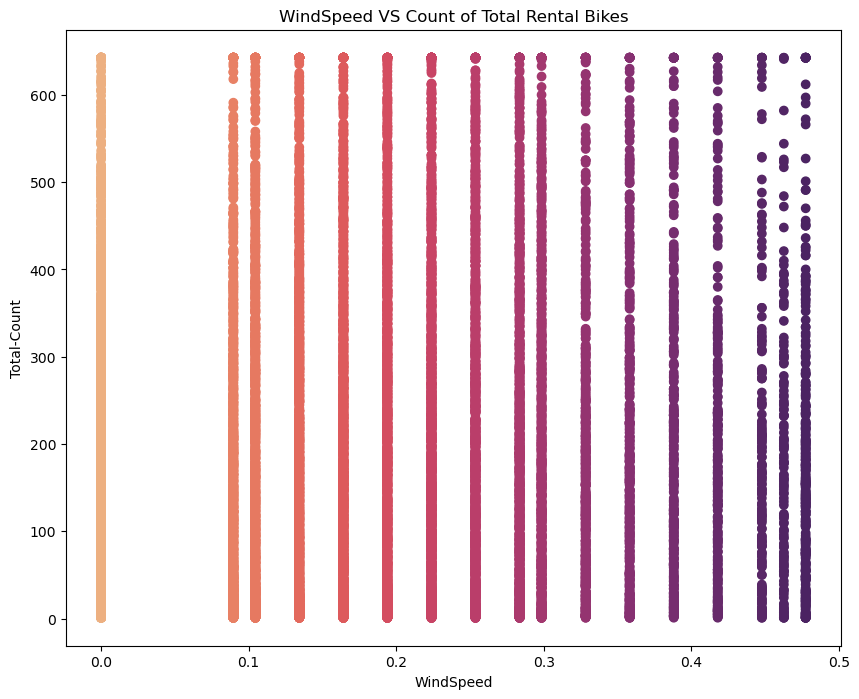

In [35]:
for feature in num_features:
    if feature != "TotalCount":  # Skip the "TotalCount" column
        plt.figure(figsize = (10, 8))
        plt.scatter(df[feature], df["TotalCount"], c = df[feature], cmap = "flare")
        plt.cmap = "PuBu_r"
        plt.xlabel(f"{feature}")
        plt.ylabel("Total-Count")
        plt.title(f"{feature} VS Count of Total Rental Bikes")
        plt.show()

Convert Column with the namedteday to datetime

In [36]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y")

Aggregate daily data for time series analysis

In [37]:
df_D_TC = df.groupby("Date")["TotalCount"].sum().reset_index()

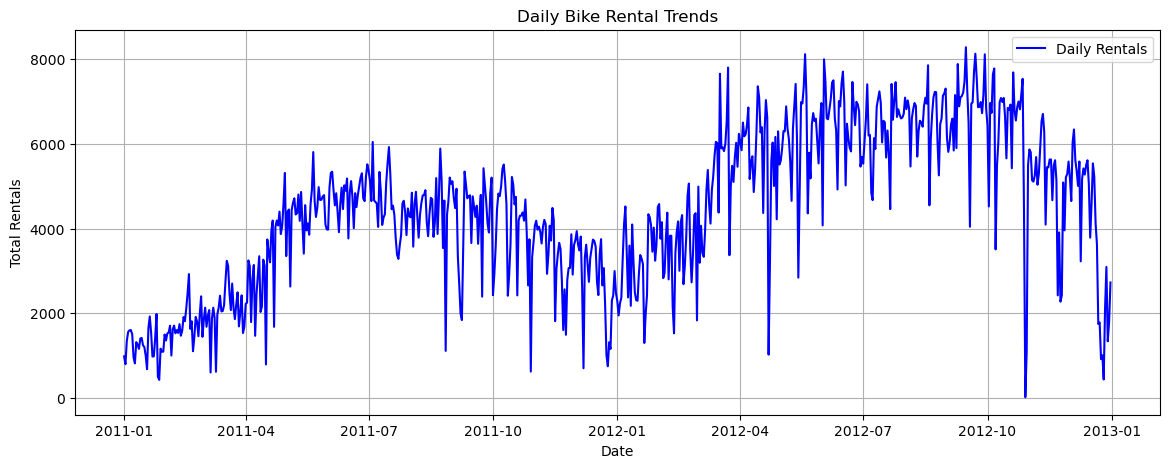

In [38]:
plt.figure(figsize = (14, 5))
plt.plot(df_D_TC["Date"], df_D_TC["TotalCount"], label = "Daily Rentals", color = "blue")
plt.title("Daily Bike Rental Trends")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
df

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,2011-01-01,springer,2011,1,0.0,No,6.0,No work,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2011-01-01,springer,2011,1,1.0,No,6.0,No work,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,2011-01-01,springer,2011,1,2.0,No,6.0,No work,Clear,0.22,0.2727,0.63,0.0000,5.0,27.0,32.0
3,2011-01-01,springer,2011,1,3.0,No,6.0,No work,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,2011-01-01,springer,2011,1,4.0,No,6.0,No work,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,springer,2012,12,19.0,No,1.0,Working Day,Mist,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,2012-12-31,springer,2012,12,20.0,No,1.0,Working Day,Mist,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
17376,2012-12-31,springer,2012,12,21.0,No,1.0,Working Day,Clear,0.50,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,2012-12-31,springer,2012,12,22.0,No,1.0,Working Day,Clear,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


subplot layout - 4 rows, 1 column, first subplot

--- Observations from the Original Time Series

Gradual Upward Trend --- The demand for bikes increases over time, which is generally a good sign.
Fluctuations Exist --- There are some ups and downs, but the overall trend is increasing.
Smoother Growth in Later Stages --- Towards the end of the time series, the demand stabilizes at a higher value.
Good Sign --- The gradual increase in demand suggests growing popularity of bike rentals.
Manageable Growth --- The demand doesn’t spike suddenly but grows in a controlled manner, which allows for better planning.


--- Observations from the Trend

Looking at the trend in the image, it shows a steady and consistent increase in bike demand over time. This is generally a good sign
Positive Growth --- Indicates more people are using bike rentals, suggesting increasing popularity.
Predictable Trend --- Since the increase is gradual, it allows bike-sharing companies to plan ahead for fleet expansion, pricing strategies, and operations.
Sustainable Demand --- A smooth upward trend suggests a stable and manageable rise rather than sudden spikes.
If the increase becomes too Steep, the company might struggle with bike shortages, leading to longer wait times and customer dissatisfaction.


--- Analysis of the Seasonality Component

Recurring Peaks and Troughs --- The pattern repeats at regular intervals, indicating a strong seasonal effect on bike demand.
Higher Demand in Certain Months --- The peaks suggest that bike rentals increase at specific times of the year.
Sharp Drops in Some Periods --- The demand significantly decreases in some months, likely due to external factors such as weather, holidays, or working days.

-- Implications for Bike Supply Management

During peak seasons, more bikes should be available to meet demand.
During low seasons, companies may reduce the number of bikes in operation to optimize costs.
Understanding seasonality helps in accurate demand forecasting, preventing shortages or excess supply.

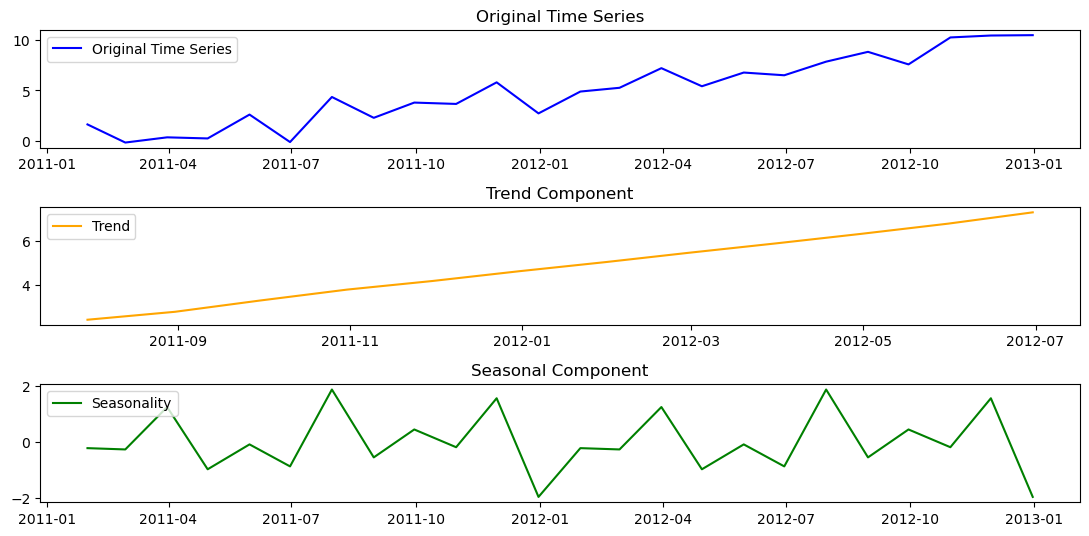

In [40]:
np.random.seed(1)
date_range = pd.date_range(start = "01-01-2011", end = "31-12-2012", freq = "M")
data = np.random.randn(len(date_range)) + np.linspace(0, 10, len(date_range))
time_series = pd.Series(data, index = date_range)

decomposition = seasonal_decompose(time_series, model = "additive")

plt.figure(figsize = (11, 7))
plt.subplot(411)
plt.plot(time_series, label = "Original Time Series", color = "blue")
plt.legend(loc = "upper left")
plt.title("Original Time Series")

plt.subplot(412)
plt.plot(decomposition.trend, label = "Trend", color = "orange")
plt.legend(loc = "upper left")
plt.title("Trend Component")

plt.subplot(413)
plt.plot(decomposition.seasonal, label = "Seasonality", color = "green")
plt.legend(loc = "upper left")
plt.title("Seasonal Component")

plt.tight_layout()
plt.show()

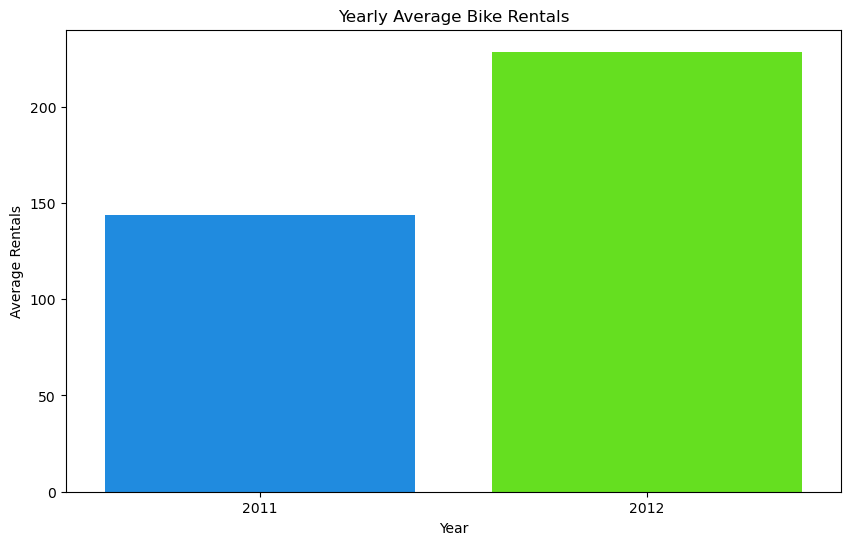

In [41]:
year_avg = df.groupby("Year")["TotalCount"].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x = year_avg.index, y = year_avg.values, palette = "gist_rainbow_r")
plt.title("Yearly Average Bike Rentals")
plt.xlabel("Year")
plt.ylabel("Average Rentals")
plt.show()

Month - Monthly Seasonality

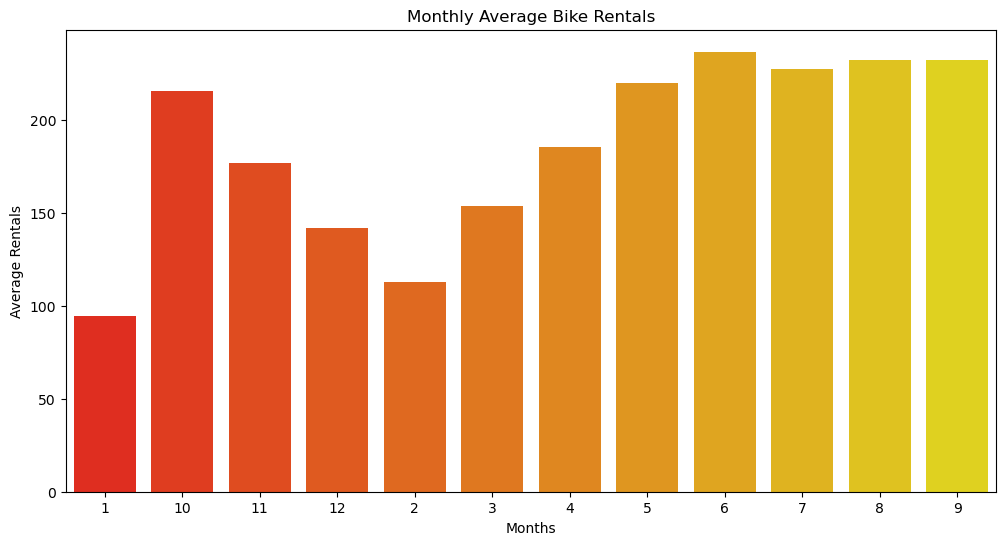

In [42]:
monthly_avg = df.groupby("Month")["TotalCount"].mean()

plt.figure(figsize = (12, 6))
sns.barplot(x = monthly_avg.index, y = monthly_avg.values, palette = "autumn")
plt.title("Monthly Average Bike Rentals")
plt.xlabel("Months")
plt.ylabel("Average Rentals")
plt.show()

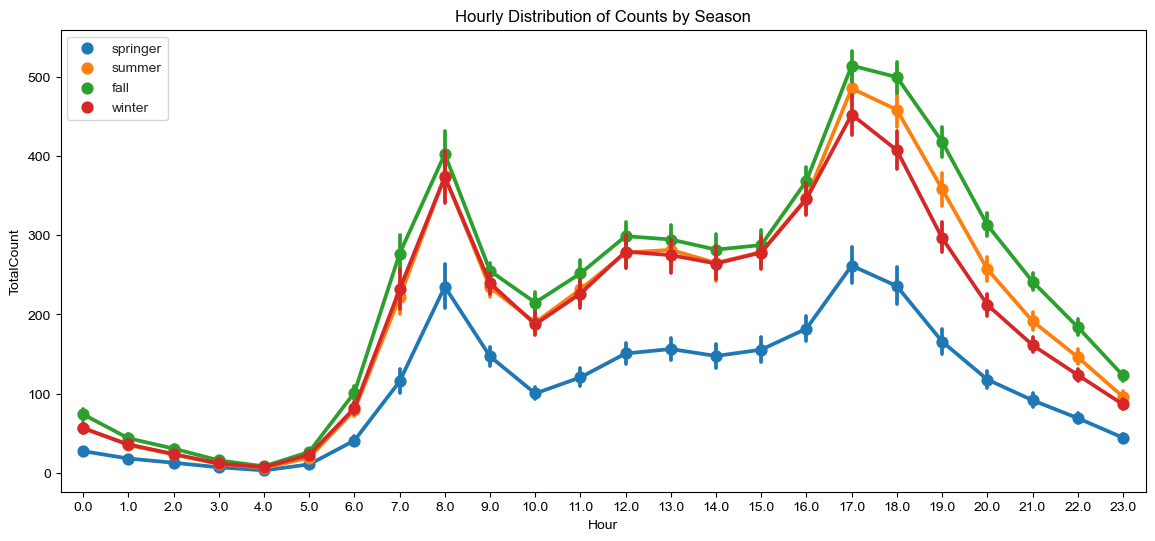

In [43]:
plt.subplots(figsize = (14, 6))
sns.set_style("white")

sns.pointplot(x = "Hour", y = "TotalCount", data = df[["Hour", "TotalCount", "Season"]], hue = "Season")
plt.title("Hourly Distribution of Counts by Season")
plt.legend(loc = "upper left")
plt.show()

Hour - Hourly Patterns

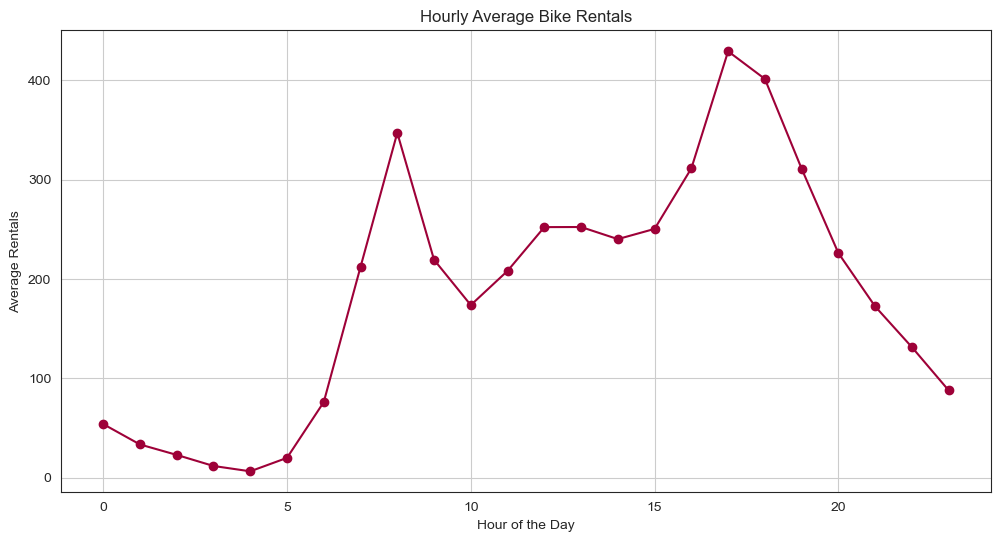

In [44]:
hourly_avg = df.groupby("Hour")["TotalCount"].mean()

plt.figure(figsize = (12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker = "o", linestyle = "-", color = "#9e0138")
plt.title("Hourly Average Bike Rentals")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.show()

Weekday - Weekly Patterns

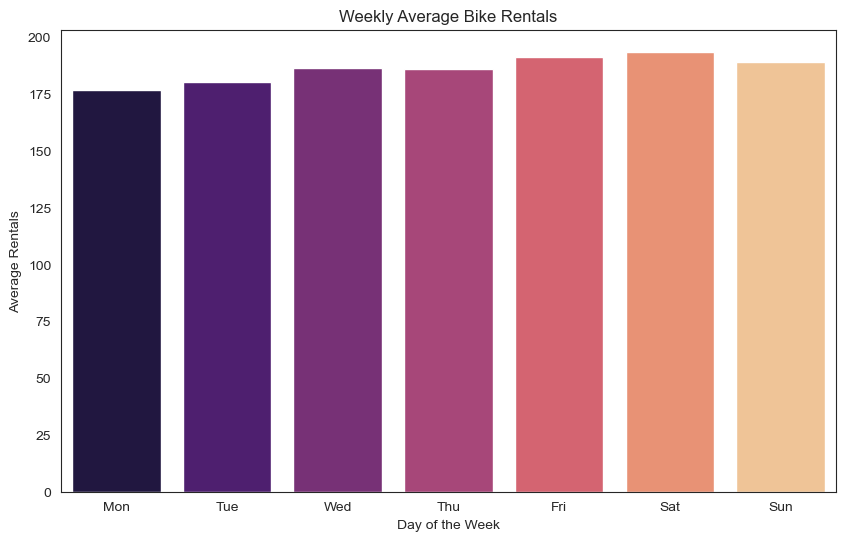

In [45]:
weekday_avg = df.groupby("Weekday")["TotalCount"].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x = weekday_avg.index, y = weekday_avg.values, palette = "magma")
plt.title("Weekly Average Bike Rentals")
plt.xlabel("Day of the Week")
plt.ylabel("Average Rentals")
plt.xticks(ticks = range(7), labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

Holiday (Holiday Impact)

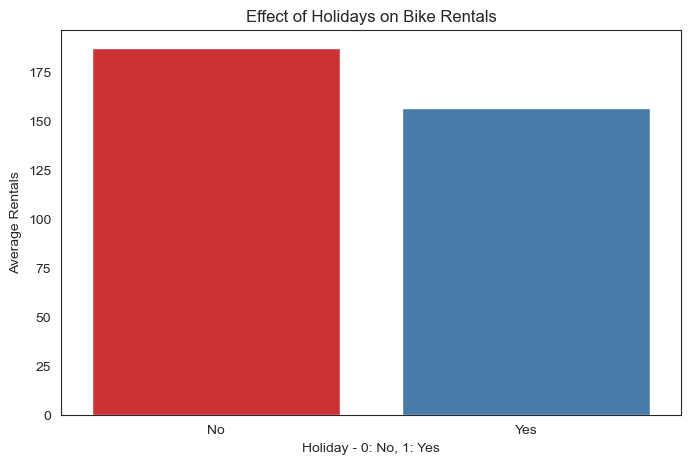

In [46]:
holiday_avg = df.groupby("Holiday")["TotalCount"].mean()

plt.figure(figsize = (8, 5))
sns.barplot(x = holiday_avg.index, y = holiday_avg.values, palette = "Set1")
plt.title("Effect of Holidays on Bike Rentals")
plt.xlabel("Holiday - 0: No, 1: Yes")
plt.ylabel("Average Rentals")
plt.show()

WorkingDay Effect of Working Days

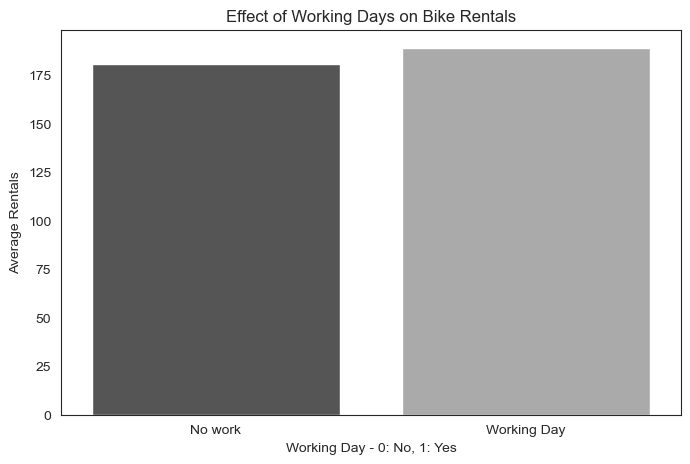

In [47]:
workingday_avg = df.groupby("WorkingDay")["TotalCount"].mean()

plt.figure(figsize = (8, 5))
sns.barplot(x = workingday_avg.index, y = workingday_avg.values, palette = "gist_gray")
plt.title("Effect of Working Days on Bike Rentals")
plt.xlabel("Working Day - 0: No, 1: Yes")
plt.ylabel("Average Rentals")
plt.show()

<Axes: >

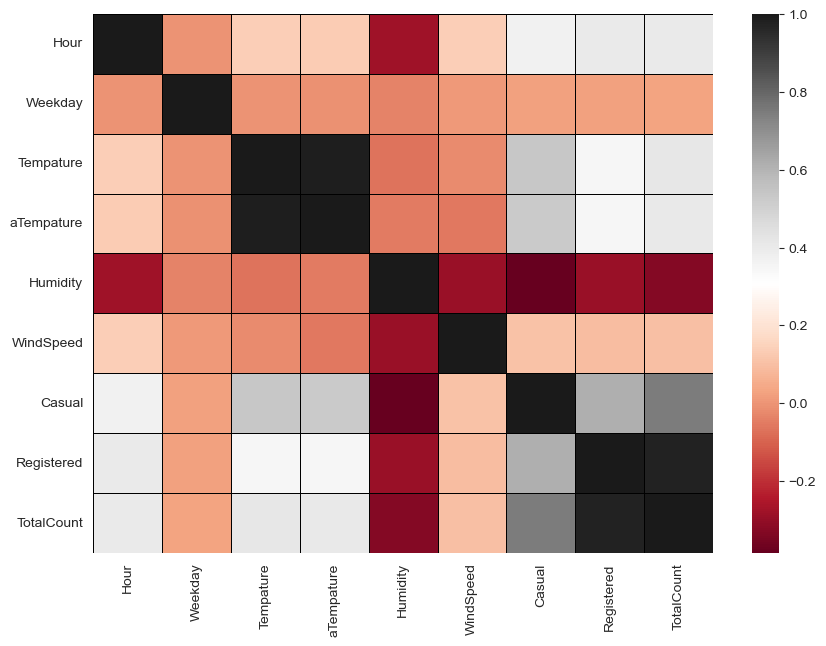

In [48]:
corr_matrix = df.select_dtypes(include = np.number).corr()
plt.figure(figsize = (10, 7))
sns.heatmap(corr_matrix,  cmap = "RdGy", linewidth = 0.7, linecolor = "Black", annot = False)

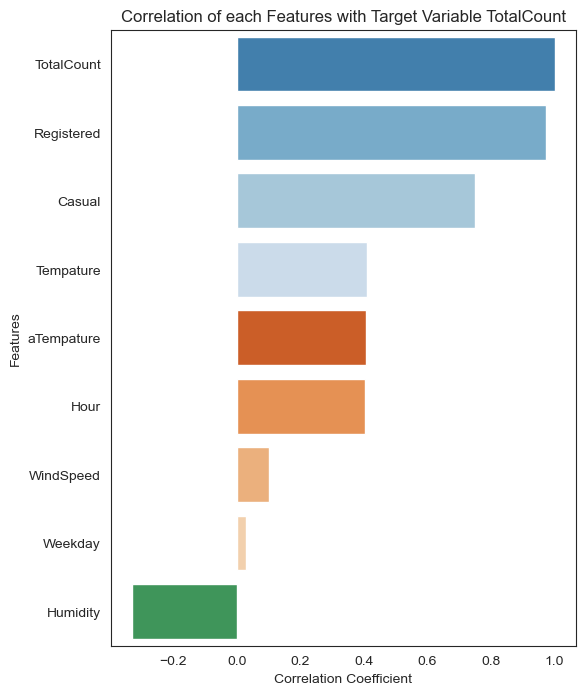

In [49]:
target_corr_matx = corr_matrix["TotalCount"].sort_values(ascending = False)

plt.figure(figsize = (6, 8))
sns.barplot(x = target_corr_matx.values, y = target_corr_matx.index, palette = "tab20c")
plt.title("Correlation of each Features with Target Variable TotalCount")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

In [50]:
df.head(1)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,2011-01-01,springer,2011,1,0.0,No,6.0,No work,Clear,0.24,0.2879,0.81,0.0,3.0,13.0,16.0


--- Data preprocessing
Data Encoding

In [51]:
label_encoder = LabelEncoder()

df["Season"] = label_encoder.fit_transform(df["Season"])
df["Holiday"] = label_encoder.fit_transform(df["Holiday"])
df["WorkingDay"] = label_encoder.fit_transform(df["WorkingDay"])
df["Weather_Condition"] = label_encoder.fit_transform(df["Weather_Condition"])

df.head(65)

,Date,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,2011-01-01,1,2011,1,0.0,0,6.0,0,0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2011-01-01,1,2011,1,1.0,0,6.0,0,0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,2011-01-01,1,2011,1,2.0,0,6.0,0,0,0.22,0.2727,0.63,0.0000,5.0,27.0,32.0
3,2011-01-01,1,2011,1,3.0,0,6.0,0,0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,2011-01-01,1,2011,1,4.0,0,6.0,0,0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2011-01-03,1,2011,1,15.0,0,1.0,1,0,0.26,0.2424,0.30,0.2537,14.0,58.0,72.0
61,2011-01-03,1,2011,1,16.0,0,1.0,1,0,0.26,0.2424,0.30,0.2537,9.0,67.0,76.0
62,2011-01-03,1,2011,1,17.0,0,1.0,1,0,0.24,0.2273,0.30,0.2239,11.0,146.0,157.0
63,2011-01-03,1,2011,1,18.0,0,1.0,1,0,0.24,0.2576,0.32,0.1045,9.0,148.0,157.0


In [52]:
df = df.drop("Date", axis = 1)
df.head(3)

,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,1,2011,1,0.0,0,6.0,0,0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,1,2011,1,1.0,0,6.0,0,0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,1,2011,1,2.0,0,6.0,0,0,0.22,0.2727,0.63,0.0,5.0,27.0,32.0


--- Data preprocessing
Feature Scaling / Data Scaling

In [53]:
num_col_slr = ["Tempature", "aTempature", "Humidity",
               "WindSpeed", "Casual", "Registered", "TotalCount"]

scaler = MinMaxScaler()
df[num_col_slr] = scaler.fit_transform(df[num_col_slr])
df

,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered,TotalCount
0,1,2011,1,0.0,0,6.0,0,0,0.224490,0.2879,0.804124,0.000000,0.026316,0.026052,0.023383
1,1,2011,1,1.0,0,6.0,0,0,0.204082,0.2727,0.793814,0.000000,0.070175,0.064128,0.060795
2,1,2011,1,2.0,0,6.0,0,0,0.204082,0.2727,0.618557,0.000000,0.043860,0.054108,0.048324
3,1,2011,1,3.0,0,6.0,0,0,0.224490,0.2879,0.742268,0.000000,0.026316,0.020040,0.018706
4,1,2011,1,4.0,0,6.0,0,0,0.224490,0.2879,0.742268,0.000000,0.000000,0.002004,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,2012,12,19.0,0,1.0,1,3,0.244898,0.2576,0.587629,0.343874,0.096491,0.216433,0.183944
17375,1,2012,12,20.0,0,1.0,1,3,0.244898,0.2576,0.587629,0.343874,0.070175,0.162325,0.137178
17376,1,2012,12,21.0,0,1.0,1,0,0.489796,0.2576,0.587629,0.343874,0.061404,0.166333,0.138737
17377,1,2012,12,22.0,0,1.0,1,0,0.244898,0.2727,0.546392,0.281257,0.114035,0.096192,0.093531


--- Model Selection and Training

In [54]:
y = df["TotalCount"]
x = df.iloc[:, 0:14]

In [55]:
x

,Season,Year,Month,Hour,Holiday,Weekday,WorkingDay,Weather_Condition,Tempature,aTempature,Humidity,WindSpeed,Casual,Registered
0,1,2011,1,0.0,0,6.0,0,0,0.224490,0.2879,0.804124,0.000000,0.026316,0.026052
1,1,2011,1,1.0,0,6.0,0,0,0.204082,0.2727,0.793814,0.000000,0.070175,0.064128
2,1,2011,1,2.0,0,6.0,0,0,0.204082,0.2727,0.618557,0.000000,0.043860,0.054108
3,1,2011,1,3.0,0,6.0,0,0,0.224490,0.2879,0.742268,0.000000,0.026316,0.020040
4,1,2011,1,4.0,0,6.0,0,0,0.224490,0.2879,0.742268,0.000000,0.000000,0.002004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,2012,12,19.0,0,1.0,1,3,0.244898,0.2576,0.587629,0.343874,0.096491,0.216433
17375,1,2012,12,20.0,0,1.0,1,3,0.244898,0.2576,0.587629,0.343874,0.070175,0.162325
17376,1,2012,12,21.0,0,1.0,1,0,0.489796,0.2576,0.587629,0.343874,0.061404,0.166333
17377,1,2012,12,22.0,0,1.0,1,0,0.244898,0.2727,0.546392,0.281257,0.114035,0.096192


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [57]:
df.shape

(17379, 15)

In [58]:
print(x_train.shape)
print(x_test.shape)

(13903, 14)
(3476, 14)


In [59]:
print(y_train.shape)
print(y_test.shape)

(13903,)
(3476,)


--- Hyperparameters
These are settings that are external to the model and are set by the user before training.

-Random Forest

-Specified Hyperparameters

n_estimators = 100 --- This specifies that the random forest will consist of 100 Decision Trees
random_state = 42 --- This is set for reproducibility


-Default Hyperparameters

max_depth --- Default is None (the trees can grow until all leaves are pure)
min_samples_split --- Default is 2
min_samples_leaf --- Default is 1
max_features --- Default is auto (which means the number of features to consider when looking for the best split).

In [60]:
rdm_fst_mdl = RandomForestRegressor(n_estimators = 100, random_state = 42)  # Before Training line -- In this line the Hyperparameters are set before training
rdm_fst_mdl.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

--- Decision Tree

-Specified Hyperparameters

random_state = 42 --- This is set for reproducibility

-Default Hyperparameters

max_depth --- Default is None (the tree can grow until all leaves are pure)
min_samples_split --- Default is 2
min_samples_leaf --- Default is 1
criterion --- Default is "squared_error" (for regression tasks)

In [61]:
dt_mdl = DecisionTreeRegressor(random_state = 42)  # Before Training line -- In this line the Hyperparameters are set before training
dt_mdl.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

--- Gradient Boosting

-Specified Hyperparameters

random_state = 42 --- This is set for reproducibility

-Default Hyperparameters

n_estimators --- Default is 100 (the number of boosting stages)
learning_rate --- Default is 0.1 (the step size shrinkage used in the update to prevent overfitting)
max_depth --- Default is 3 (the maximum depth of the individual regression estimators)

In [62]:
gb_mdl = GradientBoostingRegressor(random_state = 42)  # Before Training line -- In this line the Hyperparameters are set before training
gb_mdl.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

Evaluate Function / Evaluation Function

y_true, y_test --- The True Target Values from the Test Set.
y_pred, dt_predict --- The Predicted Values from the Model.

RMSE --- Measures the Average Magnitude of the Errors between Predicted and Actual Values.
MAE --- Measures the Average Absolute Errors between Predicted and Actual Values.
R-Squared --- Indicates the proportion of Variance in the Dependent Variable that can be explained by the Independent Variables.

In [63]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-Squared: {r2:.2f}")

Model Evaluation

In [64]:
print("Decision Tree:")
dt_predict = dt_mdl.predict(x_test)
evaluate_model(y_test, dt_predict)

print("\nRandom Forest:")
rf_predict = rdm_fst_mdl.predict(x_test)
evaluate_model(y_test, rf_predict)

print("\nGradient Boosting:")
gb_predict = gb_mdl.predict(x_test)
evaluate_model(y_test, gb_predict)

Decision Tree:
RMSE: 0.02
MAE: 0.01
R-Squared: 0.99

Random Forest:
RMSE: 0.01
MAE: 0.00
R-Squared: 1.00

Gradient Boosting:
RMSE: 0.02
MAE: 0.01
R-Squared: 1.00


--- Customization

The grids allow you to specify a range of values for each hyperparameter that you want to test.
This customization is essential because the default values may not be optimal for your specific dataset or problem.

The dt_param_grid, rf_param_grid, gb_param_grid is a dictionaries defining a set of hyperparameters for tuning Decision Tree,Random Forest, Gradient Boosting.

n_estimators, max_depth, min_samples_split, and min_samples_leaf are called Hyperparameters.
[None, 5, 10, 15], [2, 5, 10] all these are known as Parameter Grids or Candidate Values for each Hyperparameter

--- dt_param_grid, rf_param_grid, gb_param_grid

-- n_estimators:

Specifies the number of trees in the forest.
Higher values typically improve performance but increase computation time.
Values in grid: [50, 100, 150], meaning we will try forests with 50, 100, and 150 trees.

-- max_depth:

Defines the maximum depth of each tree.
None means the tree grows until all leaves are pure (overfitting risk).
A smaller value (e.g., max_depth = 5) prevents overfitting.

-- min_samples_split:

The minimum number of samples required to split an internal node.
2: Default, splits a node if at least 2 samples are present.
5, 10: Higher values prevent the tree from splitting too often (reduces overfitting).

-- min_samples_leaf:

The minimum number of samples required in a leaf node.
1: Default, allows single samples in a leaf (prone to overfitting).
2, 4: Forces each leaf to have at least 2 or 4 samples, making trees more generalizable.
Higher values lead to smoother predictions and prevent tiny, unreliable splits.

In [65]:
dt_param_grid = {"max_depth" : [None, 5, 10, 15],
                 "min_samples_split": [2, 5, 10],
                 "min_samples_leaf": [1, 2, 4]
}

rf_param_grid = {"n_estimators" : [50, 100, 150],
                 "max_depth" : [None, 10, 20],
                 "min_samples_split" : [2, 5, 10],
                 "min_samples_leaf": [1, 2, 4]
}

gb_param_grid = {"n_estimators" : [50, 100, 150],
                 "learning_rate" : [0.01, 0.1, 1],
                 "max_depth" : [3, 5, 7]
}

shuffle = True 
Indicates that the data will be shuffled before splitting into folds, which helps in reducing bias.

In [66]:
crs_vdn = KFold(n_splits = 5, shuffle = True, random_state = 42)

RandomizedSearchCV, GridSearchCV 

Both RandomizedSearchCV and GridSearchCV are hyperparameter tuning techniques in scikit-learn used to find the best set of hyperparameters for a model.

Too small or too large values can lead to overfitting or underfitting.
GridSearchCV and RandomizedSearchCV help find the best combination.

GridSearchCV exhaustively searches over all possible parameter combinations.

estimator = dt_mdl 
specifies the decision tree model that you want to optimize.

param_grid = dt_param_grid 
is a dictionary or list of dictionaries that defines the hyperparameters and their respective values to be tested.

cv = crs_vdn 
specifies the cross-validation strategy to be used, which in this case is the K-Fold defined earlier

RandomizedSearchCV & GridSearchCV 
are both methods for hyperparameter tuning in machine learning. They are part of the model selection process, which aims to find the best configuration of hyperparameters for a given machine learning model to optimize its performance.


--- Question

dt_grid_search = GridSearchCV(
    estimator = dt_mdl,
    param_grid = dt_param_grid,
    cv = crs_vdn,
    scoring = "neg_mean_absolute_error"
)

why the estimator = dt_mdl?
if the model is already 

dt_mdl = DecisionTreeRegressor(random_state = 42)
dt_mdl.fit(x_train, y_train) trained

--- Answer

The reason dt_mdl (which is already trained) is passed as the estimator in GridSearchCV

Even though dt_mdl has already been trained with dt_mdl.fit(x_train, y_train), GridSearchCV does not use this trained model. Instead, it takes the DecisionTreeRegressor object and trains new models from scratch for each hyperparameter combination.

--- scoring = "neg_mean_absolute_error"

Errors like MAE should be minimized.
To convert MAE into a maximization problem, scikit-learn negates the values, making them negative.

--- rf_random_search
n_iter = 10 means it will try 10 Random Combinations

--- Is Scoring Always Negative?
No, it's not. Scoring is only negative when you are using error metrics that are naturally meant to be minimized.

--- Positive Scores
Classification metrics like accuracy, precision, recall, F1-score, and area under the ROC curve (AUC) are naturally designed to be maximized. These metrics are typically used directly without negation.
For example using "accuracy" as a scoring parameter will not result in a negitive value.

In [67]:
dt_grid_search = GridSearchCV(estimator = dt_mdl,
                              param_grid = dt_param_grid,
                              cv = crs_vdn,
                              scoring = "neg_mean_absolute_error")

rf_random_search = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 42),
                                      param_distributions = rf_param_grid,
                                      n_iter = 10,
                                      cv = crs_vdn,
                                      scoring = "neg_mean_absolute_error")

gb_grid_search = GridSearchCV(estimator = gb_mdl,
                              param_grid = gb_param_grid,
                              cv = crs_vdn,
                              scoring = "neg_mean_absolute_error")

In [68]:
dt_grid_search.fit(x_train, y_train)
rf_random_search.fit(x_train, y_train)
gb_grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_absolute_error')

best_params_ --- only returns the best hyperparameter values found by the search process.

best_score_ is an Attribute in scikit-learn that stores the Best Cross-Validated Score.

dt_grid_search.best_params_ --- returns the best hyperparameters found during Grid Search

dt_grid_search.best_score_ --- gives the best cross-validated score obtained during Grid Search
Since Grid Search usually uses negative mean squared error (MSE) for regression problems, best_score_ is negative

In [ ]:
# best_score_ --- is stored as negative MSE (e.g., -0.006866)
# Taking -dt_grid_search.best_score_ --- negates it, converting it back to positive MSE.
# Applying np.sqrt() gives the root mean squared error (RMSE), which is always positive.

# dt_grid_search.best_score_ = -0.006866
# RMSE = np.sqrt(-dt_grid_search.best_score_)
#      = np.sqrt(-(-0.006866))
#      = np.sqrt(0.006866)
#      = 0.0828      # After Squaring the the RMSE Value

In [69]:
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best RMSE:", np.sqrt(-dt_grid_search.best_score_))

print("\nRandom Forest Best Parameters:", rf_random_search.best_params_)
print("Random Forest Best RMSE:", np.sqrt(-rf_random_search.best_score_))

print("\nGradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boosting Best RMSE:", np.sqrt(-gb_grid_search.best_score_))

Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Best RMSE: 0.08280985373539754

Random Forest Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Random Forest Best RMSE: 0.06960793073111994

Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Gradient Boosting Best RMSE: 0.06951643052687394


best_estimator_ --- is an attribute of GridSearchCV or RandomizedSearchCV that returns the best-performing model (estimator) with the best-found hyperparameters.

best_estimator_ --- returns the full Decision Tree model that was trained using the best hyperparameters.

In [70]:
best_dt_mdl = dt_grid_search.best_estimator_
best_rf_mdl = rf_random_search.best_estimator_
best_gb_mdl = gb_grid_search.best_estimator_

This means you can immediately use it for predictions

In [71]:
dt_best_predictions = best_dt_mdl.predict(x_test)
rf_best_predictions = best_rf_mdl.predict(x_test)
gb_best_predictions = best_gb_mdl.predict(x_test)

Comparing with the Actual Values - y_test with the Prediticted Values - dt_best_predictions

In [72]:
print("Tuned Decision Tree:")
evaluate_model(y_test, dt_best_predictions)

print("\nTuned Random Forest:")
evaluate_model(y_test, rf_best_predictions)

print("\nTuned Gradient Boosting:")
evaluate_model(y_test, gb_best_predictions)

Tuned Decision Tree:
RMSE: 0.02
MAE: 0.01
R-Squared: 1.00

Tuned Random Forest:
RMSE: 0.01
MAE: 0.00
R-Squared: 1.00

Tuned Gradient Boosting:
RMSE: 0.01
MAE: 0.00
R-Squared: 1.00


wb - write-binary mode
"wb" is used because Pickle stores objects in a binary format.

Uses Pickle's dump function to save the trained Random Forest model (best_rf_mdl) into the file.

In [73]:
dox = "best_rf_mdl.pkl"
with open(dox, "wb") as file:
    pk.dump(best_rf_mdl, file)
print("Model has been saved successfully as best_rf_mdl.pkl")

Model has been saved successfully as best_rf_mdl.pkl
